In [31]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import random as rn

import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

import warnings

from scipy.io import loadmat
from sklearn.model_selection import train_test_split

1. Load Dataset

In [32]:
%config IPCompleter.greedy = True

In [33]:
warnings.filterwarnings('ignore')

In [34]:
mnist = loadmat('mnist-original.mat')

In [35]:
x = mnist['data'].T
y = mnist['label'][0]

In [36]:
print('MNIST data shape - {0}'.format(x.shape))
print('MNIST label shape - {0}'.format(y.shape))

MNIST data shape - (70000, 784)
MNIST label shape - (70000,)


2. Data Preparation

In [37]:
img_height = 28
img_width = 28
channels = 1

input_shape = (img_height, img_width, channels)
num_classes = 10

epoch = 20
batch_size = 128

In [38]:
x_reshape = x.reshape(x.shape[0], img_height, img_width, channels)

print(x_reshape.shape)

(70000, 28, 28, 1)


In [39]:
y_encoded = keras.utils.to_categorical(y, num_classes)

print(y_encoded.shape)

(70000, 10)


In [40]:
idx = rn.sample(range(0, len(y_encoded)), 10)
y_random = []
for i in idx:
    y_random.append([int(x) for x in y_encoded[i]])

y_random

[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]

In [41]:
x_reshape = x_reshape.astype('float32')
x_reshape /= 255

3. Train / Test Split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_reshape, y_encoded, test_size = 0.25, random_state = 0)

In [43]:
print('training data shape : image - {0}, label - {1}'.format(x_train.shape, y_train.shape))
print('test data shape : image - {0}, label - {1}'.format(x_test.shape, y_test.shape))

training data shape : image - (52500, 28, 28, 1), label - (52500, 10)
test data shape : image - (17500, 28, 28, 1), label - (17500, 10)


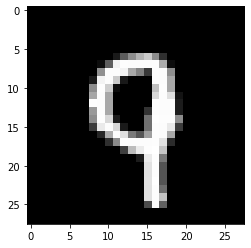

In [44]:
idx = rn.randint(0, x_train.shape[0])
plt.imshow(x_train[idx][:,:,0],"gray") 

In [45]:
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.25, random_state = 0)

In [46]:
print('training data shape : image - {0}, label - {1}'.format(x_train.shape, y_train.shape))
print('validation data shape : image - {0}, label - {1}'.format(x_validation.shape, y_validation.shape))

training data shape : image - (39375, 28, 28, 1), label - (39375, 10)
validation data shape : image - (13125, 28, 28, 1), label - (13125, 10)


4. Model

In [47]:
# model
model = Sequential()

# first conv layer
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), 
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(num_classes, activation='softmax'))

# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [48]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [49]:
model.fit(x_train, 
         y_train,
         batch_size = batch_size,
         epochs = epoch,
         verbose = 1,
         validation_data=(x_validation, y_validation))

Epoch 1/20
308/308 [==============================] - 38s 122ms/step - loss: 2.2858 - accuracy: 0.1451 - val_loss: 2.2490 - val_accuracy: 0.2984
Epoch 2/20
308/308 [==============================] - 36s 118ms/step - loss: 2.2317 - accuracy: 0.2430 - val_loss: 2.1891 - val_accuracy: 0.4864
Epoch 3/20
308/308 [==============================] - 36s 117ms/step - loss: 2.1737 - accuracy: 0.3433 - val_loss: 2.1203 - val_accuracy: 0.5534
Epoch 4/20
308/308 [==============================] - 35s 114ms/step - loss: 2.1048 - accuracy: 0.4212 - val_loss: 2.0376 - val_accuracy: 0.6051
Epoch 5/20
308/308 [==============================] - 35s 115ms/step - loss: 2.0213 - accuracy: 0.4744 - val_loss: 1.9393 - val_accuracy: 0.6488
Epoch 6/20
308/308 [==============================] - 36s 117ms/step - loss: 1.9250 - accuracy: 0.5186 - val_loss: 1.8246 - val_accuracy: 0.6786
Epoch 7/20
308/308 [==============================] - 35s 115ms/step - loss: 1.8168 - accuracy: 0.5466 - val_loss: 1.6967 - val_ac

5. Evaluation

In [50]:
model.evaluate(x_test, y_test)

547/547 [==============================] - 4s 8ms/step - loss: 0.6464 - accuracy: 0.8449


[0.6464349031448364, 0.8449142575263977]

In [51]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(lr=0.0001, momentum=0.9, nesterov=True),
              metrics=['accuracy'])

In [52]:
model.fit(x_train, 
         y_train,
         batch_size = batch_size,
         epochs = epoch,
         verbose = 1,
         validation_data=(x_validation, y_validation))

Epoch 1/20
308/308 [==============================] - 35s 111ms/step - loss: 0.7819 - accuracy: 0.7614 - val_loss: 0.5451 - val_accuracy: 0.8562
Epoch 2/20
308/308 [==============================] - 34s 111ms/step - loss: 0.6965 - accuracy: 0.7826 - val_loss: 0.4866 - val_accuracy: 0.8670
Epoch 3/20
308/308 [==============================] - 34s 111ms/step - loss: 0.6373 - accuracy: 0.8014 - val_loss: 0.4482 - val_accuracy: 0.8742
Epoch 4/20
308/308 [==============================] - 33s 107ms/step - loss: 0.6014 - accuracy: 0.8145 - val_loss: 0.4209 - val_accuracy: 0.8808
Epoch 5/20
308/308 [==============================] - 34s 111ms/step - loss: 0.5682 - accuracy: 0.8244 - val_loss: 0.3988 - val_accuracy: 0.8863
Epoch 6/20
308/308 [==============================] - 34s 110ms/step - loss: 0.5452 - accuracy: 0.8336 - val_loss: 0.3821 - val_accuracy: 0.8905
Epoch 7/20
308/308 [==============================] - 33s 107ms/step - loss: 0.5289 - accuracy: 0.8368 - val_loss: 0.3662 - val_ac

In [53]:
model.evaluate(x_test, y_test)

547/547 [==============================] - 5s 10ms/step - loss: 0.2580 - accuracy: 0.9231


[0.25795093178749084, 0.9231428503990173]